In [1]:
using Plots, Random, Distributions

## Estimating $\pi$

Let $S$ be the area of a unit square $[0, 1] \times [0, 1]$. Let $A$ be the area of a circle, centered at $(0.5, 0.5)$ with radius $r = 0.5$. I.e. 
$$A = \pi r^2 = \frac{1}{4} \pi$$


Let $X$ and $Y$ be two independent uniform random variables on $[0, 1]$. 
The probability that a point $(X, Y)$ falls into the unit circle is: $\frac{A}{S} = \frac{1}{4} \pi$. 

If we repeat the experiment $n$ times, the number of points $Z$ which fall inside the circle is a $\text{Binomial}(\frac{\pi}{4}, n)$ random variable.
We can, therefore, use an estimate for $\pi$ as 
$$\hat{\pi} = 4 \cdot \frac{\hat{Z}}{n}$$
The law of large numbers guarantees that as $N \to \infty $, $\hat{\pi} \to \pi$.

We can assess the quality of our estimate by computing a $95\%$ confidence interval for using a Normal approximation:

$$\left[ \hat{\pi} - 1.96 \cdot \sqrt{\frac{\hat{\pi}(4 - \hat{\pi})}{n}}, \hat{\pi} + 1.96 \cdot \sqrt{\frac{\hat{\pi}(4 - \hat{\pi})}{n}}\right]$$

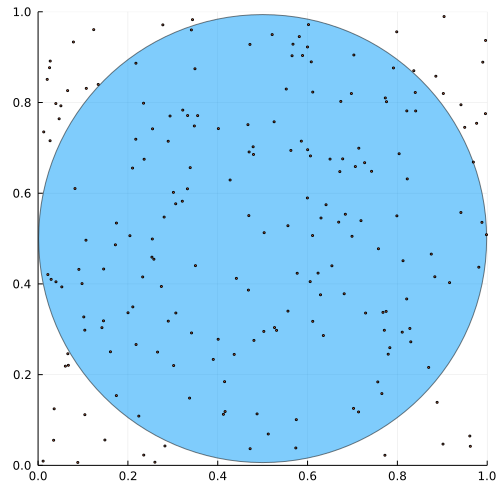

In [16]:
d = Uniform()
n = 200
x = rand(d, n)
y = rand(d, n)

markerunit = 100*(452.106/181)
scatter(
    [0.5],[0.5], markersize=markerunit, size=(500,500),
    xlims=(0,1), ylims=(0,1), alpha=0.5, legend = false
)
scatter!(x, y, markersize=2, legend=false)

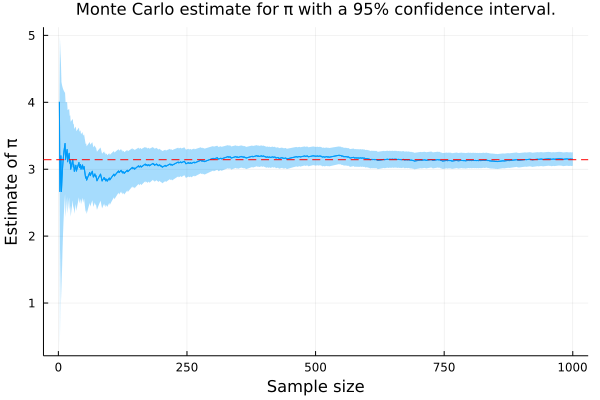

In [53]:
function circle_raindrop(n=1000)
    d = Uniform()
    x = rand(d, n)
    y = rand(d, n)
    π = 4 * cumsum(x.^2 + y.^2 .< 1) ./ [1:1:n;]
    conf_int = 1.96 * (pi .* (4 .- π) ./ [1:1:n;]) .^ 0.5
    return π, conf_int
end

mid, w = circle_raindrop()
plot([mid mid], fillrange=[mid .- w, mid .+ w], fillalpha=0.35, c = [1 1], 
    xlabel = "Sample size", ylabel = "Estimate of \\pi", legend = false,
    title = "Monte Carlo estimate for \\pi with a 95% confidence interval.",
    titlefontsize=11)
hline!([π], linestyle=:dash, color="red")


## Monte Carlo Integration

We want to comput the integral $I = \int_a^b f(x)$, where $f(x)$ is bounded between $0$ and $M$ on $[a, b]$. 
The interpretation of an integral is the area under the curve $y = f(x)$. Hence, we can repeat the same raindrop experiment as for estimating $\pi$.

Let $X \sim \text{Uniform}[a, b]$ and $Y \sim \text{Uniform}[0, M]$. The probability that a point $(X, Y)$ falls below the curve is given by 
$$p = \frac{\int_a^b f(x)}{M(b-a)}$$

Hence, our Monte Carlo estimate of $I = \int_a^b f(x)$ can be obtained with
$$\hat{I} = \hat{p} \cdot M(b-a), \quad \hat{p} = \frac{\hat{Z}}{n}$$

Where $n$ is the number of all 'raindrop' data points, and $\hat{Z}$ the number of points which fell under the curve.

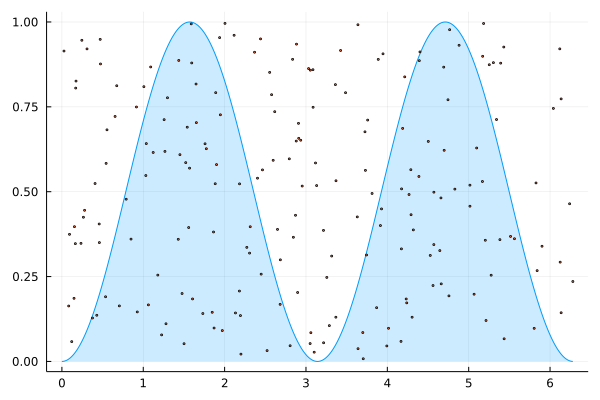

In [19]:
function f(x)
    sin.(x) .^ 2
end

a = 0
b = 2 * π
M = 1

n = 200
x = rand(Uniform(a, b), n)
y = rand(Uniform(0, M), n)

lin_x = [0:0.01:b;]
plot(lin_x, f(lin_x), fillrange = [zeros(length(lin_x)) f(lin_x)], 
    legend = false, fillalpha = 0.2)
scatter!(x, y, markersize = 2)

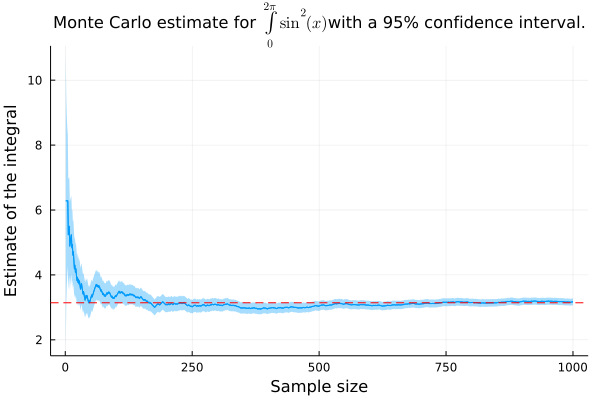

In [55]:
function integral_raindrop(n=1000)
    x = rand(Uniform(0, b), n)
    y = rand(Uniform(), n)
    p = cumsum(y .< f(x)) ./ [1:1:n;]
    I = p * M * (b - a)
    CI = 1.96 * (p .* (M*(b - a) .- p) ./ [1:1:n;]) .^ 0.5
    return I, CI
end

mid, w = integral_raindrop()
plot([mid mid], fillrange=[mid .- w, mid .+ w], fillalpha=0.35, c = [1 1], 
    xlabel="Sample size", ylabel="Estimate of the integral", legend = false,
    title = "Monte Carlo estimate for \$\\int_0^{2\\pi}\\sin^2(x)\$" * 
    "with a 95% confidence interval.", titlefontsize=11)
hline!([π], linestyle=:dash, color="red")

## Pseudo-random numbers

### Congruential pseudo-random number generator

A congruential generator is an algorithm that yields a sequence of pseudo-randomized numbers. The method represents one of the oldest and best-known pseudorandom number generator algorithms. The generator is defined by the recurrence relation:

$$Z_{n+1} = (aZ_{n} + c)\mod{M}$$

where $Z$ is the sequence of pseudo-random values, and $M$ is the "modulus", $a$ the "multiplier", $c$ the "increment" and $X_0$ the "seed" or the "start value".

An example of a congruential pseudo-random number generator is $\text{RANDU}$, which was very popular in the 1970s. It used $a = 2^{16} + 3$, $c = 0$, and $M = 2^{31}$.

In [58]:
function cong_prng(;N, a, c, M, seed)
    z = zeros(N)
    z[1] = seed
    for i in range(1, N - 1)
        z[i + 1] = (a * z[i] + c) % M
        
    end
    return z
end

cong_prng (generic function with 1 method)

Linear congruential generators are typically a poor choice. It can be shown, that depending on the choice of $a, c, M$ all the points will lie on a number of parallel hyperplanes in a $n$-dimensional cube. See below an example for $a = 1229$, $c = 1$, and $M = 2^{11}$.

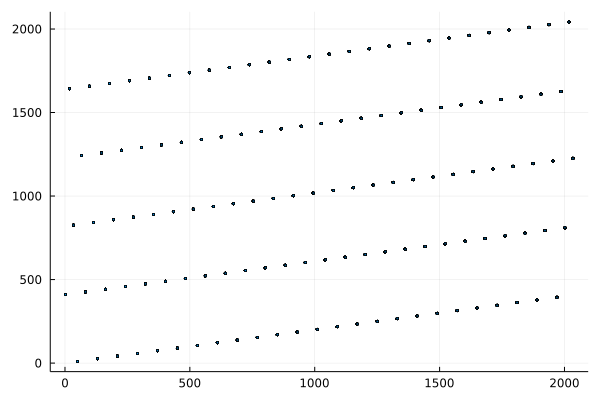

In [71]:
z = cong_prng(N=20000, a=1229, c=0, M=2^11, seed=2)
z = reshape(z, (2, 10000))
scatter(z[1,:], z[2,:], markersize = 2, legend = false)

---
Bibliography:
1. ST407 Monte Carlo Methods - Lecture notes by Adam M. Johansen (University of Warwick)
2. Pseudo random number generator - [wikipedia](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) article